In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scat_ang(SZA,VZA,RAA):
    '''
    Return the scattering angle in degrees
    SZA,VZA : Source(ray)_Zenith_Angle, Viewing_Zenith_Angle (in degrees)
    RAA : Source Azimuth Angle - (Apparent)Scattering Azimuth
    '''
#    RAA=0-180-RAA
# scat_a=cos(VZA)*cos(SZA)+sin(VZA)*sin(SZA)*cos(SAA-VAA)
    SZA=np.deg2rad(SZA);
    VZA=np.deg2rad(VZA)
    RAA=np.deg2rad(RAA)
    
    scat_a=np.arccos(np.cos(SZA)*np.cos(VZA)+np.sin(SZA)*np.sin(VZA)*np.cos(RAA))
    scat_a=np.rad2deg(scat_a)
    return scat_a

In [3]:
NUMU = 90 # Number of polar angles
NTAU = 2 # Number of optical depths
UMU0 = np.cos(np.pi/3)-0.001 # cosine of the incident beam's zenith angle
PHI0 = 0.0 # Azimuth angle of the incident beam
PHIs=np.loadtxt('INTENSITY.dat',skiprows=NUMU*NTAU)
data=np.loadtxt('INTENSITY.dat',max_rows=NUMU*NTAU)

ztau=data[:,0] # tau level as z axis
mu =data[:,1]  # cos(VZA)
rawI = data[:,2:] # I(PHIs)

VZA = np.hstack((np.rad2deg(np.arccos(mu[0:NUMU])),np.flipud(np.rad2deg(np.arccos(mu[0:NUMU])))))
VAA = np.hstack((np.zeros(NUMU,dtype=float)+PHIs[2],np.zeros(NUMU,dtype=float)+PHIs[0]))
I = np.hstack((rawI[0:NUMU,2],np.flipud(rawI[0:NUMU,0])))
SZA = np.zeros_like(I,dtype=float)+np.rad2deg(np.arccos(UMU0))
SAA = np.zeros_like(I,dtype=float)+PHI0
srSZA = SZA
srAA = PHI0 
RAA = srAA-VAA
ScatA = scat_ang(srSZA,VZA,RAA)

In [118]:
VAA

array([180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180., 180., 180., 180., 180., 180., 180., 180., 180., 180.,
       180., 180.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Text(0, 0.5, 'I')

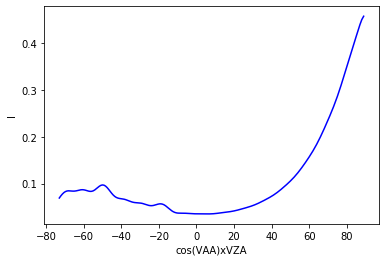

In [4]:
plt.plot(np.cos(np.rad2deg(VAA))*VZA,I,'b')
plt.xlabel('cos(VAA)xVZA')
plt.ylabel('I')

Text(0, 0.5, 'I')

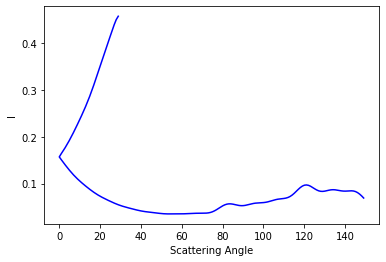

In [6]:
plt.plot(ScatA,I,'b')
plt.xlabel('Scattering Angle')
plt.ylabel('I')